# Stock Market Prediction using Time-series and Daily News Analysis
## Simple Linear Regression
### Preprocessing and Modeling

In [3]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime as dt

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

pd.set_option('mode.chained_assignment', 'raise') # Raise an exception, warn, or no action if trying to use chained assignment

In [4]:
# Read the combines stock index CSV data file from the data directory
dataset = pd.read_csv('data/comb_data_final.csv',index_col='Date',parse_dates=True)

In [6]:
# Create a separate dataset
new_data = dataset.reset_index()[['Date', 'Adj Close']]
new_data.head()

,Date,Adj Close
0,2008-08-08,11734.320312
1,2008-08-11,11782.349609
2,2008-08-12,11642.469727
3,2008-08-13,11532.959961
4,2008-08-14,11615.929688


In [5]:
new_data.shape

(1989, 2)

In [6]:
# Set the threshold two years before the last date (at the beginning of 7th year)
threshold = new_data['Date'].max() - pd.DateOffset(years=2) 
# Create Train and Test datasets
X_train = new_data[new_data['Date'] <= threshold]['Date']
X_test = new_data[new_data['Date'] > threshold]['Date']
y_train = new_data[new_data['Date'] <= threshold]['Adj Close']
y_test = new_data[new_data['Date'] > threshold]['Adj Close']
X_train.shape, X_test.shape

((1484,), (505,))

### Optional Idea: Using past prices to predict future prices
### dependent variable y is basically prices shifted upwards - Not sure about this method

In [16]:
df=dataset.copy()[['Adj Close']]
df['Prediction'] = df[['Adj Close']].shift(-505)
X = np.array(df.drop(['Prediction'],1))
X = X[:-505]
y = np.array(df['Prediction'])
y = y[:-505]
len(X),len(y)

(1484, 1484)

### Optional Idea: Using date index to predict future prices

In [74]:
df2=dataset.copy()[['Adj Close']]
X = np.array(df2.index.map(dt.datetime.toordinal)).reshape(-1, 1)
y = df2['Adj Close']
linreg = LinearRegression().fit(X, y)
linreg.score(X, y)
predictions = linreg.predict(X)

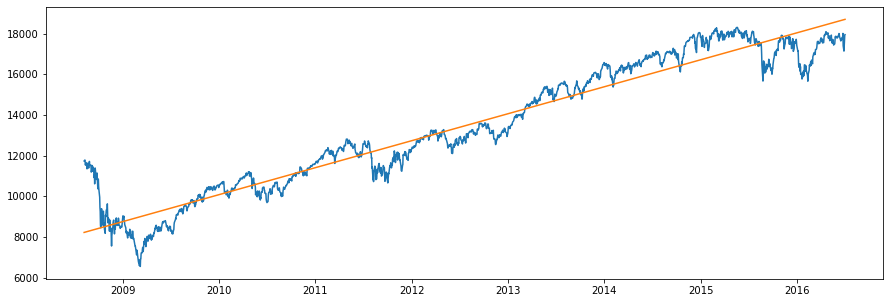

In [36]:
plt.figure(figsize=(15,5))
plt.plot(df2['Adj Close'])
plt.plot(df2.index, predictions)

### Pre-process: We are using date index for Simple Linear Regression

In [7]:
# We are using the toordinal() function that returns the Gregorian ordinal of a date to transform the Date index to an ordinal form for ML algorithms to process
X_train=X_train.map(dt.datetime.toordinal)
X_test=X_test.map(dt.datetime.toordinal)

In [8]:
Train_dates = np.array(X_train).reshape(len(X_train),1)
Train_prices = np.array(y_train).reshape(len(y_train),1)
Test_dates = np.array(X_test).reshape(len(X_test),1)

### Model

In [9]:
#implement linear regression
model = LinearRegression()
model.fit(Train_dates,Train_prices)

#make predictions and find the rmse
preds = model.predict(Test_dates)

In [10]:
#make predictions and find the rmse
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

1013.4765066410042

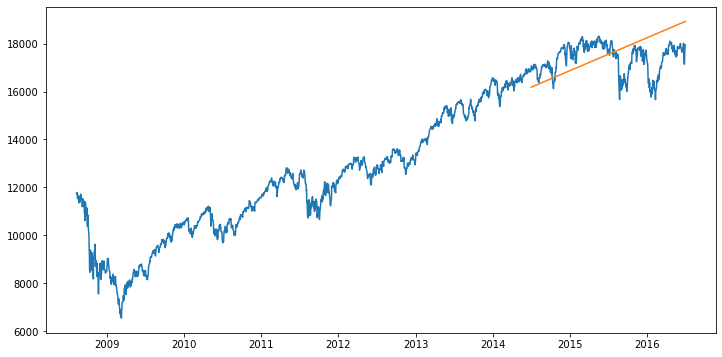

In [24]:
plt.plot(new_data['Date'],new_data['Adj Close']) #plotting the initial datapoints (full data)
plt.plot(X_test.map(dt.datetime.fromordinal),preds) #plotting the line made by linear regression (test and predictions)
plt.show()

## Multiple Linear Regression (w/ Feature Engineering)

In [7]:
new_data1 = new_data.copy()
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1989 non-null   datetime64[ns]
 1   Adj Close  1989 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.2 KB


In [8]:
# Add new features made from Date column
new_data1['Year'] = new_data1['Date'].dt.year
new_data1['Month'] = new_data1['Date'].dt.month
new_data1['Week'] = new_data1['Date'].dt.isocalendar().week
new_data1['Day'] = new_data1['Date'].dt.day
new_data1['Dayofweek'] = new_data1['Date'].dt.dayofweek
new_data1['Dayofyear'] = new_data1['Date'].dt.dayofyear
new_data1['Is_month_start'] = new_data1['Date'].dt.is_month_start.astype('int')
new_data1['Is_month_end'] = new_data1['Date'].dt.is_month_end.astype('int')
new_data1['Is_quarter_start'] = new_data1['Date'].dt.is_quarter_start.astype('int')
new_data1['Is_quarter_end'] = new_data1['Date'].dt.is_quarter_end.astype('int')
new_data1['Is_year_start'] = new_data1['Date'].dt.is_year_start.astype('int')
new_data1['Is_year_end'] = new_data1['Date'].dt.is_year_end.astype('int')

In [9]:
new_data1['mon_fri'] = 0
for i in range(0,len(new_data1)):
    if (new_data1['Dayofweek'][i] == 0 or new_data1['Dayofweek'][i] == 4):
        new_data1.loc[i, 'mon_fri'] = 1

In [10]:
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1989 non-null   datetime64[ns]
 1   Adj Close         1989 non-null   float64       
 2   Year              1989 non-null   int64         
 3   Month             1989 non-null   int64         
 4   Week              1989 non-null   UInt32        
 5   Day               1989 non-null   int64         
 6   Dayofweek         1989 non-null   int64         
 7   Dayofyear         1989 non-null   int64         
 8   Is_month_start    1989 non-null   int32         
 9   Is_month_end      1989 non-null   int32         
 10  Is_quarter_start  1989 non-null   int32         
 11  Is_quarter_end    1989 non-null   int32         
 12  Is_year_start     1989 non-null   int32         
 13  Is_year_end       1989 non-null   int32         
 14  mon_fri           1989 n

In [28]:
# Create Train and Test datasets
train = new_data1[:1484]
test = new_data1[1484:]

X_train = train.drop('Adj Close', axis=1)
X_test = test.drop('Adj Close', axis=1)
y_train = train['Adj Close']
y_test = test['Adj Close']

In [29]:
X_train['Date']=X_train['Date'].map(dt.datetime.toordinal)
X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)

### Model

In [30]:
#implement liner regression
model2 = LinearRegression()
model2.fit(X_train,y_train)

#make predictions and find the rmse
preds = model2.predict(X_test)
preds[:10]

array([16163.61935458, 16165.72582362, 16186.25686234, 16184.1629277 ,
       16186.26939673, 16188.37586577, 16194.68273846, 16208.90690449,
       16206.81296985, 16208.91943887])

In [31]:
#make predictions and find the rmse
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

1024.7383516949112

In [32]:
## Optional: Something wrong here!
lr_score = model2.score(X_test, y_test)
print("lr R^2 score: ", lr_score)

lr R^2 score:  -1.8564589916473477


In [ ]:
test['Predictions'] = preds # what is the best way to assign here

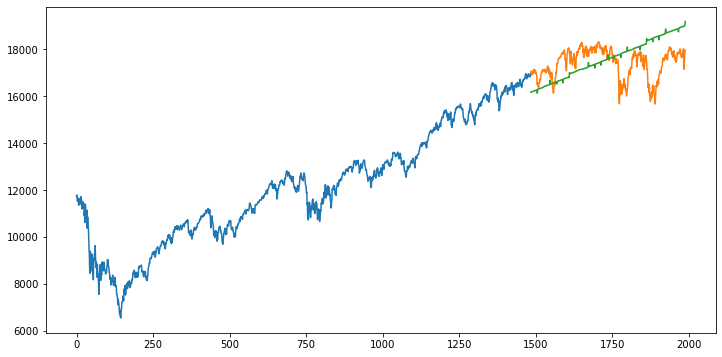

In [35]:
#plot
plt.plot(train['Adj Close'])
plt.plot(test[['Adj Close','Predictions']])

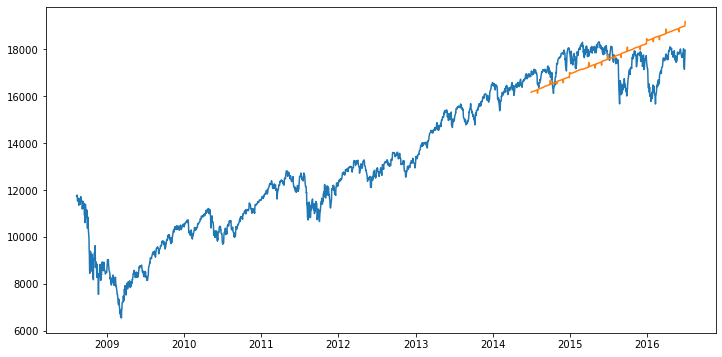

In [44]:
#### Alternative plot
plt.plot(new_data1['Date'],new_data1['Adj Close']) #plotting the initial datapoints (full data)
plt.plot(X_test['Date'].map(dt.datetime.fromordinal),preds) #plotting the line made by linear regression (test and predictions)
plt.show()